In [1]:
import requests
import pandas as pd

In [2]:
api_url = 'https://api.scryfall.com/bulk-data'
response = requests.get(api_url)
r = response.json()['data'][0]['download_uri']
r_1 = requests.get(r)

pd.DataFrame.from_dict(r_1.json())

,object,id,oracle_id,multiverse_ids,mtgo_id,mtgo_foil_id,tcgplayer_id,cardmarket_id,name,lang,...,card_faces,frame_effects,tcgplayer_etched_id,promo_types,loyalty,life_modifier,hand_modifier,attraction_lights,color_indicator,content_warning
0,card,86bf43b1-8d4e-4759-bb2d-0b2e03ba7012,0004ebd0-dfd6-4276-b4a6-de0003e94237,[15862],15870.0,15871.0,3094.0,3081.0,Static Orb,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,card,7050735c-b232-47a6-a342-01795bfd0d46,0006faf6-7a61-426c-9034-579f2cfcfa83,[370780],49283.0,49284.0,69965.0,262945.0,Sensory Deprivation,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,card,e718b21b-46d1-4844-985c-52745657b1ac,0007c283-5b7a-4c00-9ca1-b455c8dff8c3,[470580],77122.0,NaN,196536.0,391692.0,Road of Return,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,card,036ef8c9-72ac-46ce-af07-83b79d736538,000d5588-5a4c-434e-988d-396632ade42c,[83282],22609.0,22610.0,12835.0,12551.0,Storm Crow,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,card,b125d1e7-5d9b-4997-88b0-71bdfc19c6f2,000e5d65-96c3-498b-bd01-72b1a1991850,[12380],12637.0,12638.0,6412.0,10604.0,Walking Sponge,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28558,card,d6695fa8-881c-407c-91d9-3ac770372d35,fffa9334-3576-4f70-9605-2ad062cdbc69,[430770],64646.0,64647.0,136683.0,298834.0,Without Weakness,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28559,card,4d5edf4f-5695-42fc-9e57-c4faef60fbc3,fffaa634-42a0-4038-b027-24f28754fec7,[571548],101914.0,NaN,276869.0,665173.0,Firesong and Sunspeaker,en,...,NaN,[legendary],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28560,card,22a6a5f1-1405-4efb-af3e-e1f58d664e99,fffcb71f-e802-436e-917d-eaa6607ab74f,"[503766, 503767]",87643.0,NaN,230214.0,530502.0,"Toralf, God of Fury // Toralf's Hammer",en,...,"[{'object': 'card_face', 'name': 'Toralf, God ...",[legendary],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28561,card,09f06f55-7918-46c4-80ff-0bf39e091a4a,fffdc2ac-bde4-4e4c-a5bd-0e6c6e49ad91,[430833],64772.0,64773.0,132234.0,298282.0,"Samut, the Tested",en,...,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN


In [3]:
from src.base import Base
from PIL import Image
from io import BytesIO
import requests
import ast

ModuleNotFoundError: No module named 'src'

In [ ]:
df = Base().get_data()
df['image_uris'][0]['normal']

'https://cards.scryfall.io/normal/front/8/6/86bf43b1-8d4e-4759-bb2d-0b2e03ba7012.jpg?1562242171'

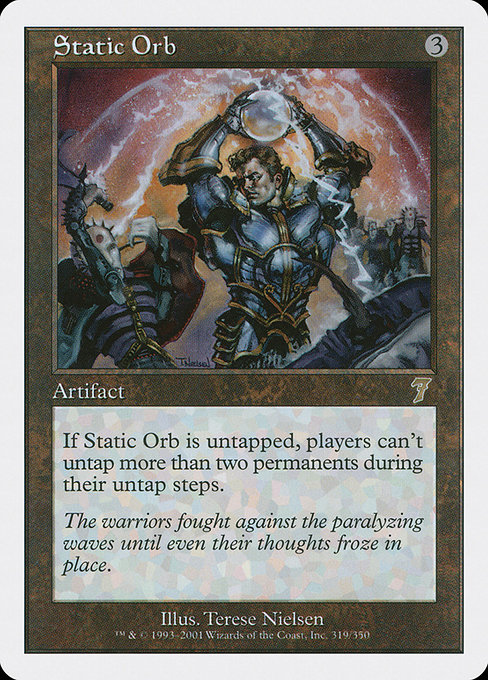

In [ ]:
# How do i get an image back?
Image.open(BytesIO(requests.get(df['image_uris'][0]['normal']).content))

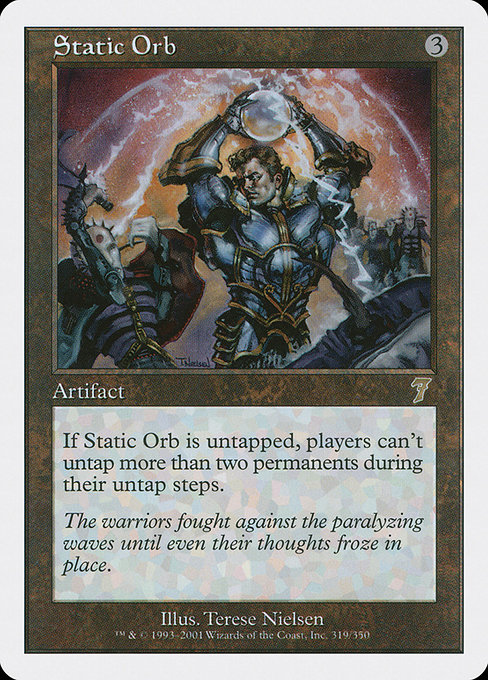

In [ ]:
i = input('Card Name')
s = df['image_uris'][df['name'] == i]

for value in s:
    k = value['normal']
Image.open(BytesIO(requests.get(df['image_uris'][0]['normal']).content))

In [13]:
# Example queries
# import first
from to_mongo import ToMongo

#Instantiate class
c = ToMongo()

# Then, we can run queries
# To start with, run a SELECT ALL query
# Use a list to take the object and see actual data
#list(c.cards.find({}))

# What if I want a specific value?
# To find the specific value, we specify the key,
# Then the value we are seeking
list(c.cards.find({'full_art': False}))
list(c.cards.find({'rarity': 'mythic'}))

# Search for a specific cmc?
list(c.cards.find({'cmc': 2.0}))

# How do I search for a specific column/value/index?
# list(c.cards.find({'cmc': 2.0}))[0]['type_line']

# What if I wanted to find values that are greater than?
# Keywords have a $ 
# # Also have to nest dictionaries 
# list(c.cards.find({'cmc': {'$gte': 3.0}}))

# answer = input('What card would you like to view?')
# list(c.cards.find({'name': answer}))



KeyError: 1

In [14]:
list(c.cards.find({'name': 'Sol Ring'}))[0]['image_uris']['normal']

'https://cards.scryfall.io/normal/front/e/c/eca9ae7b-a6d9-43ea-92d4-0110fd6643a7.jpg?1680759435'